In [292]:
import pandas as pd
from plotnine import ggplot, aes, geom_line, geom_point, geom_bar
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from imblearn.under_sampling import  RandomUnderSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Models
from sklearn.svm import SVC # Support Vector Machine
from sklearn.ensemble import RandomForestClassifier # Random Forest
import xgboost # XGBoost
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes

In [294]:
# Load Dataset
df_tweet = pd.read_csv('/content/Tweets.csv')

In [295]:
df_tweet.shape

(27481, 4)

In [296]:
# Check for empty values
df_tweet.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [297]:
# Drop empty data
df = df_tweet.dropna(axis=0)

In [298]:
df.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


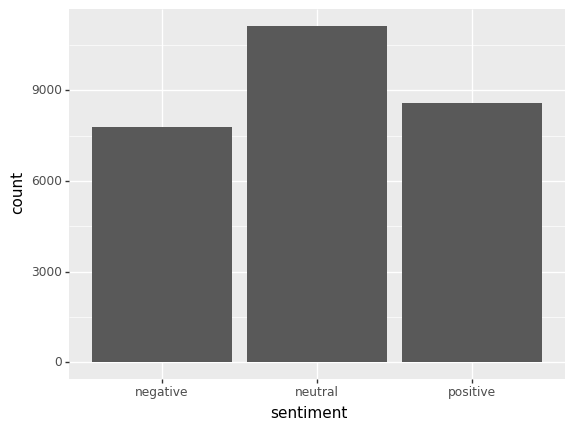

<ggplot: (8753253563493)>

In [299]:
ggplot(df, aes(x='sentiment')) + \
    geom_bar(stat = 'count')

In [260]:
df.shape

(27480, 4)

In [261]:
df['sentiment'].value_counts()

neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64

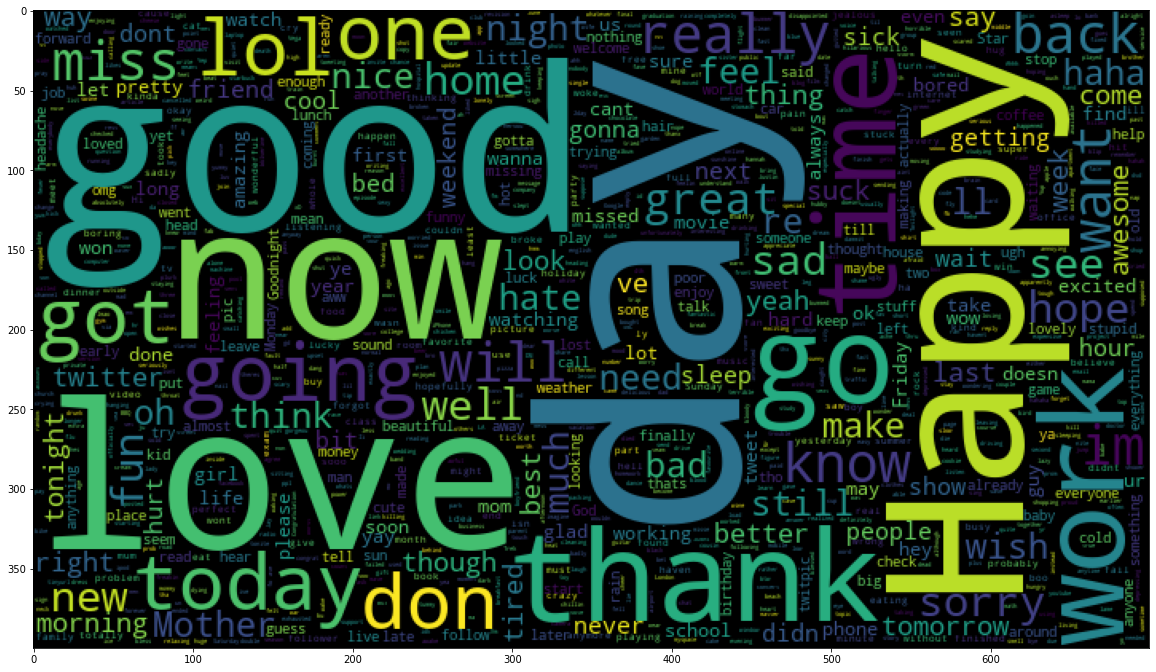

In [305]:
data_pos = df.selected_text[:]
wc = WordCloud(max_words = 1000 , width = 700 , height = 400,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [308]:
# Resample data to remove data imbalance
random_us = RandomUnderSampler(random_state=0)

df, df['sentiment'] = random_us.fit_resample(df[['selected_text']], df['sentiment'])


In [307]:
df['sentiment'].value_counts()

neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


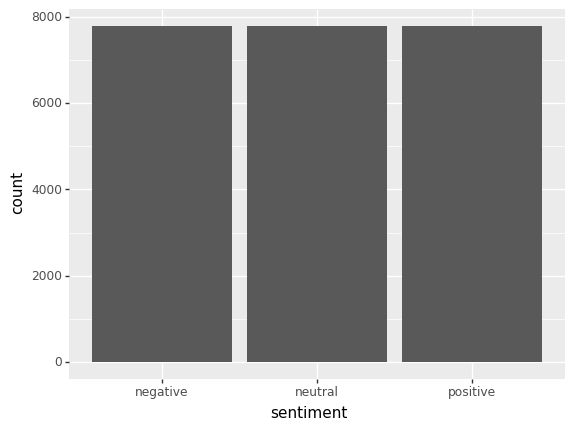

<ggplot: (8753253809601)>

In [309]:
ggplot(df, aes(x='sentiment')) + \
    geom_bar(stat = 'count')

In [310]:
X = df['selected_text']
y = df['sentiment']

In [268]:
# Splitting Data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
y_train

In [270]:
# Convert text data to numerical vector
vectorizer = TfidfVectorizer(stop_words='english')
# Train Data
X_train_vector = vectorizer.fit_transform(X_train)

# Test Data
X_test_vector = vectorizer.transform(X_test)

Support Vector Machines (SVM)

In [271]:
# Define Model
model_SVC = SVC(kernel='linear')

# Fit Model
model_SVC.fit(X_train_vector, y_train)

SVC(kernel='linear')

In [272]:
# Predict
prediction_SVC = model_SVC.predict(X_test_vector)

In [273]:
print(accuracy_score(y_test, prediction_SVC)*100)

80.33840222745769


In [274]:
print(classification_report(y_test, prediction_SVC))

              precision    recall  f1-score   support

    negative       0.80      0.80      0.80      1576
     neutral       0.76      0.79      0.78      1576
    positive       0.86      0.82      0.84      1517

    accuracy                           0.80      4669
   macro avg       0.81      0.80      0.80      4669
weighted avg       0.80      0.80      0.80      4669



In [275]:
# print(model_SVC.predict(vectorizer.transform(['Bad ratings for this movie'])))

In [276]:
# print(model_SVC.predict(vectorizer.transform([''])))

Random Forest

In [ ]:
# Model
model_RF = RandomForestClassifier(random_state=1)

In [278]:
# Fit Model
model_RF.fit(X_train_vector, y_train)

RandomForestClassifier(random_state=1)

In [279]:
# Predict 
prediction_RF = model_RF.predict(X_test_vector)

In [280]:
print(accuracy_score(y_test, prediction_RF)*100)

79.05333047761833


In [281]:
print(classification_report(y_test, prediction_RF))

              precision    recall  f1-score   support

    negative       0.76      0.80      0.78      1576
     neutral       0.76      0.77      0.76      1576
    positive       0.86      0.80      0.83      1517

    accuracy                           0.79      4669
   macro avg       0.79      0.79      0.79      4669
weighted avg       0.79      0.79      0.79      4669



Naive Bayes

In [282]:
# Model
model_MNB = GaussianNB()

# from sklearn.metrics import accuracy_score

# print(confusion_matrix(y_test, predictions))

In [283]:
# Fit Model
model_MNB.fit(X_train_vector.toarray(), y_train)

GaussianNB()

In [284]:
# Predict
prediction_MNB = model_MNB.predict(X_test_vector.toarray())

In [285]:
print(accuracy_score(y_test, prediction_MNB)*100)

58.17091454272864


In [286]:
print(classification_report(y_test, prediction_MNB))

              precision    recall  f1-score   support

    negative       0.64      0.44      0.52      1576
     neutral       0.73      0.44      0.55      1576
    positive       0.51      0.88      0.64      1517

    accuracy                           0.58      4669
   macro avg       0.62      0.59      0.57      4669
weighted avg       0.63      0.58      0.57      4669



XGBoost

In [287]:
# Model
model_XGB = xgboost.XGBClassifier()

In [288]:
# Fit Model
model_XGB.fit(X_train_vector, y_train)

XGBClassifier(objective='multi:softprob')

In [289]:
# Predict
prediction_XGB = model_XGB.predict(X_test_vector)

In [313]:
print(accuracy_score(y_test, prediction_XGB)*100)


68.81559220389805


In [314]:
print(classification_report(y_test, prediction_MNB))

              precision    recall  f1-score   support

    negative       0.64      0.44      0.52      1576
     neutral       0.73      0.44      0.55      1576
    positive       0.51      0.88      0.64      1517

    accuracy                           0.58      4669
   macro avg       0.62      0.59      0.57      4669
weighted avg       0.63      0.58      0.57      4669

